<a href="https://colab.research.google.com/github/NathanPhilipB/McDonaldMarketSegmentation_NathanPhilipB/blob/main/NathanPhilip_McDonalds_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/mcdonalds.csv')

#STEP 3: COLLECTING DATA

In [3]:
df.columns #exploring the attributes of the dataset

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
df.shape #show the dimensions of dataset

(1453, 15)

In [5]:
df.head(3) #display first 3 rows

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
MD = df
MD

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


#STEP 4: EXPLORING DATA

In [7]:
#selecting columns with binary labels
MD_x = df.loc[:, 'yummy':'disgusting']

MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [8]:
#Converting the matrix to 0s and 1s
MD_x = (MD_x == "Yes").astype(int)
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [9]:
#Creating a DataFrame and calculate the column means
result_df = pd.DataFrame(MD_x, columns=df.columns[0:11]).mean().round(2)

#Transposing the DataFrame for the desired output
result_df = result_df.transpose()

print(result_df)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [10]:
MD_x.shape

(1453, 11)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)

MD_pca = pca.fit(MD_x) # Fitting the PCA model to your data

In [12]:
#Displaying a summary
print(pd.DataFrame({
    "Standard deviation": MD_pca.explained_variance_ ** 0.5,
    "Proportion of Variance": MD_pca.explained_variance_ratio_,
    "Cumulative Proportion": MD_pca.explained_variance_ratio_.cumsum()
}).set_index(df.columns[0:11]))

            Standard deviation  Proportion of Variance  Cumulative Proportion
yummy                 0.757050                0.299447               0.299447
convenient            0.607456                0.192797               0.492244
spicy                 0.504619                0.133045               0.625290
fattening             0.398799                0.083096               0.708386
greasy                0.337405                0.059481               0.767866
fast                  0.310275                0.050300               0.818166
cheap                 0.289697                0.043849               0.862015
tasty                 0.275122                0.039548               0.901563
expensive             0.265251                0.036761               0.938323
healthy               0.248842                0.032353               0.970677
disgusting            0.236903                0.029323               1.000000


In [13]:
print("Standard deviations:")
print((MD_pca.explained_variance_ ** 0.5).round(1))
print("\nRotation:")
print(MD_pca.components_)

# If you want to print the result with a specific number of digits
pd.set_option('display.float_format', '{:0.2f}'.format)

Standard deviations:
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation:
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -

In [14]:
import plotly.express as px

In [15]:
# Extracting the loadings of each component
components = pca.fit_transform(MD_x)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [16]:
fig = px.scatter(components, x=0, y=1, labels={"0": "PC-1", "1":"PC-2"})

In [17]:
# Adding the variables to the plot using the loadings
for i, feature in enumerate(list(MD_x.columns)):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=1,
        arrowhead=1,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

#STEP 5: EXTRACTING SEGMENTS

##k-Means

In [18]:
import numpy as np
from sklearn.cluster import KMeans

In [19]:
# Set seed for reproducibility
np.random.seed(1234)

# Perform k-means clustering for k = 2 to 8
k_values = range(2, 9)
cluster_labels_list = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    cluster_labels_list.append(kmeans.inertia_)
    #cluster_labels_list.append(kmeans.labels_)


In [20]:
df_kmeans = pd.DataFrame({'I': [k for k in range(2,9)], 'WCSS': cluster_labels_list})
df_kmeans

,I,WCSS
0,2,2145.50
1,3,1818.72
2,4,1604.11
3,5,1434.61
4,6,1331.65
5,7,1248.42
6,8,1182.10


In [23]:
# You can use the silhouette score to choose the best k
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(MD_x, labels) for labels in cluster_labels_list]
best_k = k_values[np.argmax(silhouette_scores)]

# Use the best k to get the final cluster labels
final_cluster_labels = cluster_labels_list[best_k - 2]  # Adjust index since k starts from 2

# Display the final cluster labels
print("Best k:", best_k)
print("Final cluster labels:", final_cluster_labels)


ValueError: ignored

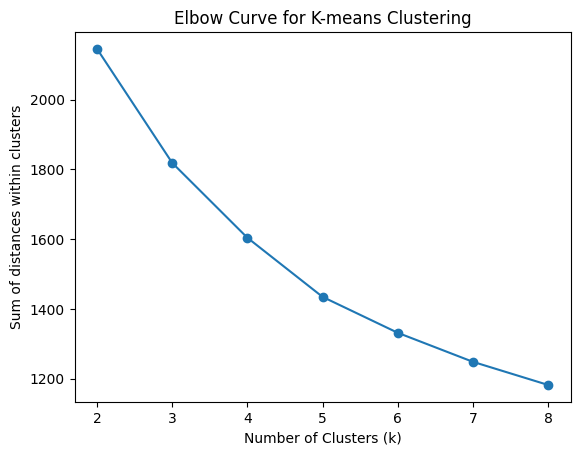

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Set seed for reproducibility
np.random.seed(1234)
MD_km28 = {}
# Performing k-means clustering for k = 2 to 8
k_values = range(2, 9)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)
    MD_km28[str(k)] = kmeans

# Plotting the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Curve for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of distances within clusters')
plt.show()

#this plot alone has no distinct elbow, and the distances decrease gradually with the cluster number.
#Therefore this alone is not a useful guide to determine the number of segments

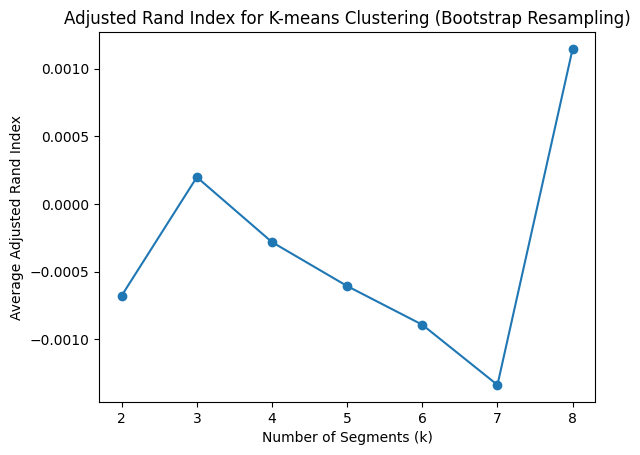

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

# Set seed for reproducibility
np.random.seed(1234)

# Number of bootstrap samples
n_bootstrap = 100

# Range of clusters to consider
k_values = range(2, 9)

# Initialize a list to store the average adjusted Rand index for each k
avg_adjusted_rand_indices = []

for k in k_values:
    # Initialize a list to store adjusted Rand indices for each bootstrap sample
    adjusted_rand_indices = []

    for _ in range(n_bootstrap):
        # Generate a bootstrap sample
        bootstrap_sample = resample(MD_x, random_state=1234)

        # Perform k-means clustering
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
        labels = kmeans.fit_predict(bootstrap_sample)

        # Calculate adjusted Rand index
        true_labels = kmeans.predict(MD_x)
        rand_index = adjusted_rand_score(true_labels, labels)
        adjusted_rand_indices.append(rand_index)

    # Average adjusted Rand indices over bootstrap samples
    avg_rand_index = np.mean(adjusted_rand_indices)
    avg_adjusted_rand_indices.append(avg_rand_index)

# Plotting the adjusted Rand index
plt.plot(k_values, avg_adjusted_rand_indices, marker='o')
plt.title('Adjusted Rand Index for K-means Clustering (Bootstrap Resampling)')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Average Adjusted Rand Index')
plt.show()

KeyError: ignored

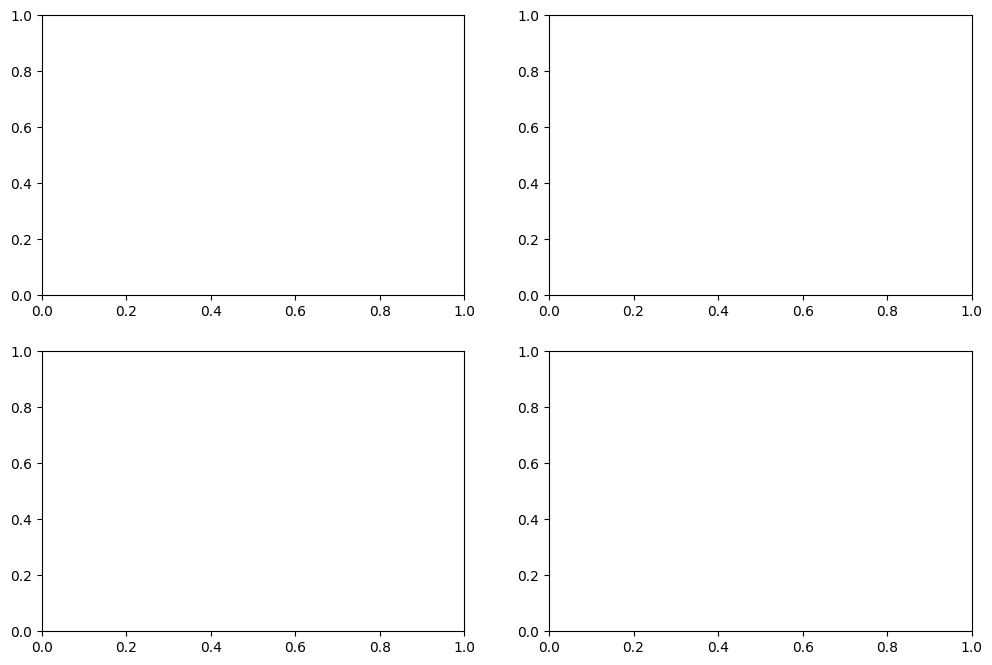

In [27]:
import matplotlib.pyplot as plt

range_values = (0, 1)
num_bins = 10
max_frequency = 200

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axs.flat, start=1):
    labels = MD_km28[str(i)].predict(MD_x)
    similarities = MD_km28[str(i)].transform(MD_x).min(axis=1)

    ax.hist(similarities, bins=num_bins, range=range_values)
    ax.set_xlabel('Similarity')
    ax.set_ylabel('Frequency')
    ax.set_title('cluster {}'.format(i))

    ax.set_xlim(range_values)
    ax.set_ylim(0, max_frequency)
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

#plotting the similarity vs frequency of all datapoints within each cluster, including clusters 1 to 4

In [ ]:
segment_solutions = ["1", "2", "3", "4", "5", "6", "7", "8"]
segment_labels = {}
segment_similarities = {}

#Ascertaining the segment stabilities for each cluster, denoting that the 4th cluster is ideal

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [37]:
#Taking 4 segments
k = 4
KMM = KMeans(n_clusters=k, random_state=1234)
KMM.fit(MD_x)
clusters = KMM.predict(MD_x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [38]:
# Using only 2 components to plot the clusters on the graph.
df_km4 = PCA(n_components=2).fit_transform(MD_x)
df_km4.shape

(1453, 2)

In [39]:
# Predicting the clusters
y_predicted = KMM.fit_predict(df_km4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [40]:
df_km4.shape

(1453, 2)

In [41]:
y_predicted.shape

(1453,)

In [42]:
y_predicted

array([1, 3, 0, ..., 3, 2, 1], dtype=int32)

##MIXTURE OF DISTRIBUTIONS

In [43]:
from sklearn.mixture import GaussianMixture

In [44]:
# Using various values to determine the optimum number of components to be used in the gaussian mixture
models=[]
aic_vals=[]
bic_vals=[]
icl_vals=[]
logLik=[]

for i in range(2, 9):
    GMM = GaussianMixture(n_components = i, n_init = 10)
    GMM.fit(MD_x)
    aic_vals.append(GMM.aic(MD_x))
    bic = GMM.bic(MD_x)
    bic_vals.append(GMM.bic(MD_x))
    logLikelihood = GMM.score_samples(MD_x)
    icl = np.sum(logLikelihood - 0.5 * bic)
    icl_vals.append(icl)
    logLik.append(GMM.score(MD_x))

In [45]:
aic_vals

[-6747.321534154395,
 -27604.247948185974,
 -35426.818505482384,
 -38517.27463964392,
 -40405.41936324244,
 -49474.001692679914,
 -52670.13448376207]

In [46]:
bic_vals

[-5791.390729048173,
 -26167.71104769486,
 -33509.67550960637,
 -36119.52554838301,
 -37527.06417659664,
 -46115.04041064921,
 -48830.567106346476]

In [47]:
icl_vals

[4211000.025420575,
 19024916.200124405,
 24362855.666981768,
 26260547.94822008,
 27284159.83397908,
 33527949.859182995,
 35502469.07000259]

In [48]:
logLik

[2.4464286077613195,
 9.68625187480591,
 12.44074965777095,
 13.566852938624885,
 14.279222079574136,
 17.462491979587032,
 18.624960249057835]

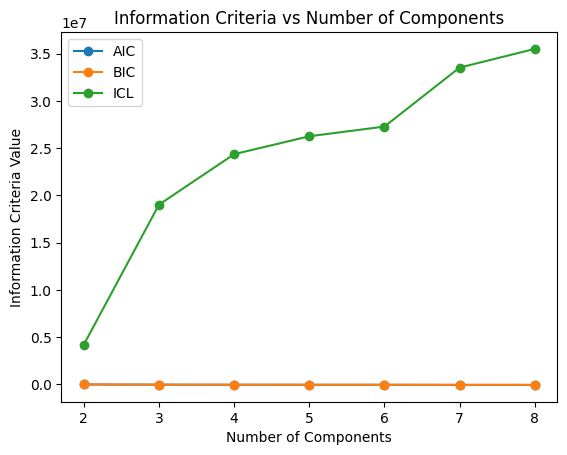

In [49]:
n_components = range(2,9)
plt.plot(n_components, aic_vals, label='AIC', marker='o')
plt.plot(n_components, bic_vals, label='BIC', marker='o')
plt.plot(n_components, icl_vals, label='ICL', marker='o')

plt.title('Information Criteria vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Information Criteria Value')
plt.legend()
plt.show()

##MIXTURE OF REGRESSION MODELS

In [50]:
import statsmodels.api as sm

In [51]:
import pandas as pd

# Create a frequency table and reverse the order
table_like = MD['Like'].value_counts().sort_index(ascending=False)

# Display the reversed frequency table
print(table_like)


 5    143
 4    160
 3    229
 2    187
 1    152
 0    169
-1     58
-2     59
-3     73
-4     71
-5    152
Name: Like, dtype: int64


In [52]:
def clean(val):
    try:
        return int(val)
    except ValueError:
        if 'love' in val:
            return 5
        else:
            return -5

In [53]:
MD['Like'] = MD['Like'].map(clean)

In [54]:
# Create a frequency table and reverse the order
table_like = MD['Like'].value_counts().sort_index(ascending=False)

# Display the reversed frequency table
print(table_like)

 5    143
 4    160
 3    229
 2    187
 1    152
 0    169
-1     58
-2     59
-3     73
-4     71
-5    152
Name: Like, dtype: int64


In [55]:
MD_x['Like_n'] = MD['Like']

In [56]:
formula = "Like_n ~ " + " + ".join(MD[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']])

In [57]:
# Fitting the model
model = sm.GLS.from_formula(formula, data=MD_x)
result = model.fit()
print(result.summary())

                            GLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.623
Model:                            GLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     216.9
Date:                Sun, 24 Dec 2023   Prob (F-statistic):          4.03e-296
Time:                        18:16:56   Log-Likelihood:                -3003.4
No. Observations:                1453   AIC:                             6031.
Df Residuals:                    1441   BIC:                             6094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9242      0.280     -6.884      0.0

In [58]:
MD_x['Cluster'] = y_predicted

In [59]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [60]:
MD_x = MD_x.drop(['Like_n', 'Cluster'], axis=1)

In [61]:
import matplotlib.pyplot as plt

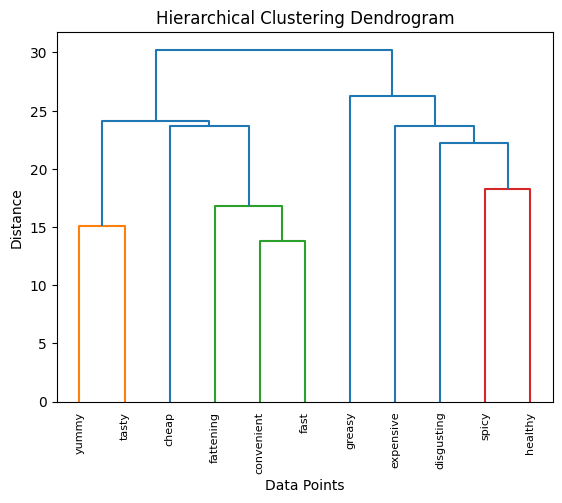

In [62]:
# Constructing a dendogram using the attributes to get the similarity of the variables
dig = linkage(MD_x.T, method='average', metric='euclidean')
dendrogram(dig, labels=MD_x.columns, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

#DESCRIBING SEGMENT

In [63]:
MD_x.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [64]:
MD_mos = pd.DataFrame({'Cluster': y_predicted})
MD_mos['Like'] = df['Like']

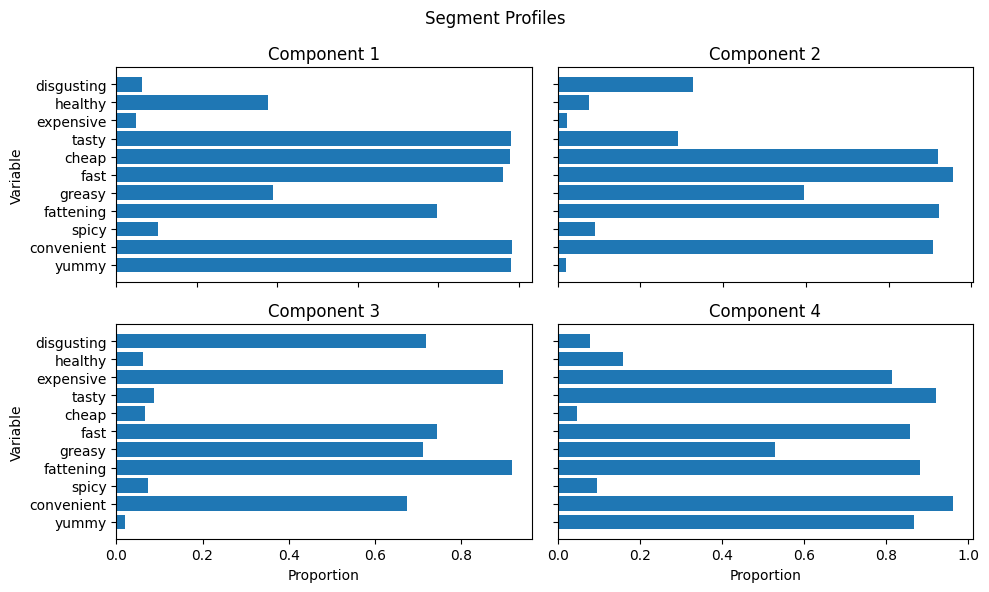

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD_x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

In [66]:
import seaborn as sns

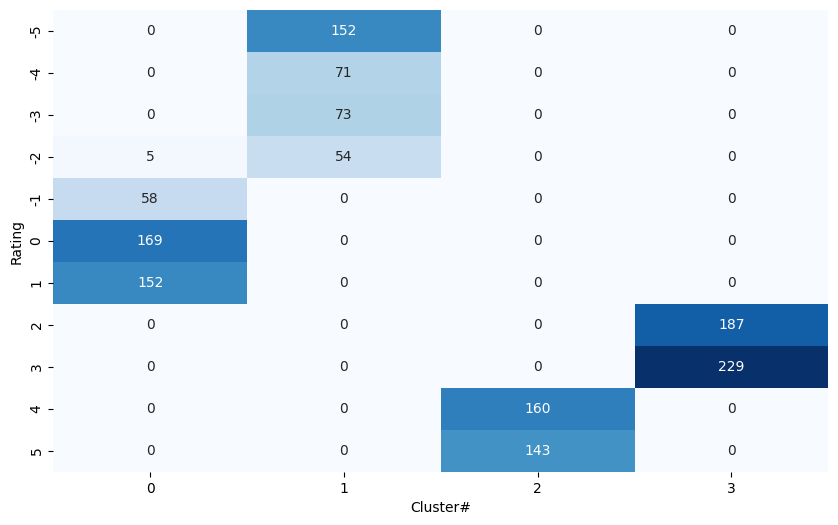

In [67]:
# Constructing a mosaic plot to get the counts of each rating in each cluster
plt.figure(figsize=(10, 6))
mosaic_data = pd.crosstab(MD_mos['Like'], MD_mos['Cluster'])
sns.heatmap(mosaic_data, cmap='Blues', annot=True, fmt='d', cbar=False)
plt.title('')
plt.ylabel('Rating')
plt.xlabel('Cluster#')
plt.show()

In [68]:
MD_mos['Age'] = MD['Age']
MD_mos['Gender'] = MD['Gender']

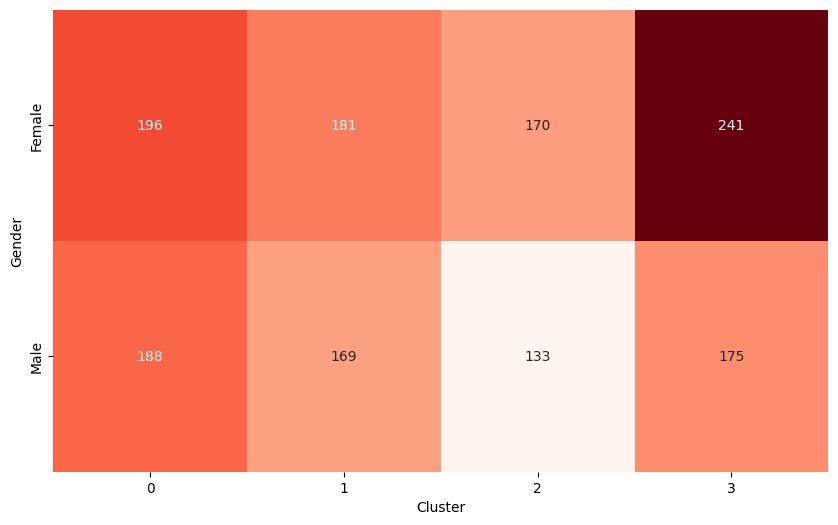

In [69]:
plt.figure(figsize=(10, 6))
mosaic_data = pd.crosstab(MD_mos['Gender'], MD_mos['Cluster'])
sns.heatmap(mosaic_data, cmap='Reds', annot=True, fmt='d', cbar=False)
plt.title('')
plt.ylabel('Gender')
plt.xlabel('Cluster')
plt.show()

#Relation between the clusters for each gender

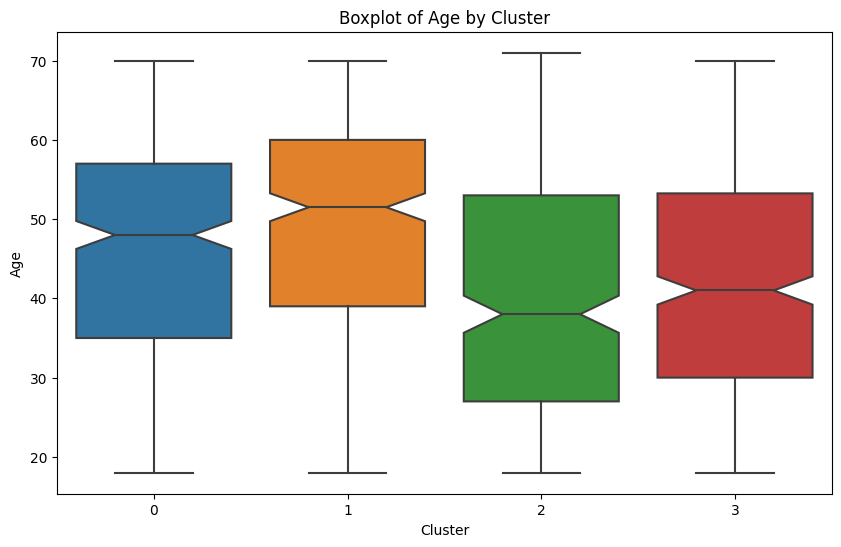

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=MD_mos, width=0.8, notch=True)
plt.title('Boxplot of Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()


#SELECTING TARGET SEGMENTS

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder

In [72]:
# Label encoding visit frequency
vf_encode = {
    'Every three months': 0,
    'Once a week': 1,
    'Once a month': 2,
    'Once a year': 3,
    'More than once a week': 4,
    'Never': 5
}

In [73]:
#Label encoding
gender_encode = {
    'Male': 0,
    'Female': 1
}

In [74]:
MD_mos['VisitFrequency'] = MD['VisitFrequency'].map(vf_encode)
MD_mos['Gender'] = MD_mos['Gender'].map(gender_encode)

In [75]:
MD_mos['VisitFrequency'].unique()

array([0, 1, 2, 3, 4, 5])

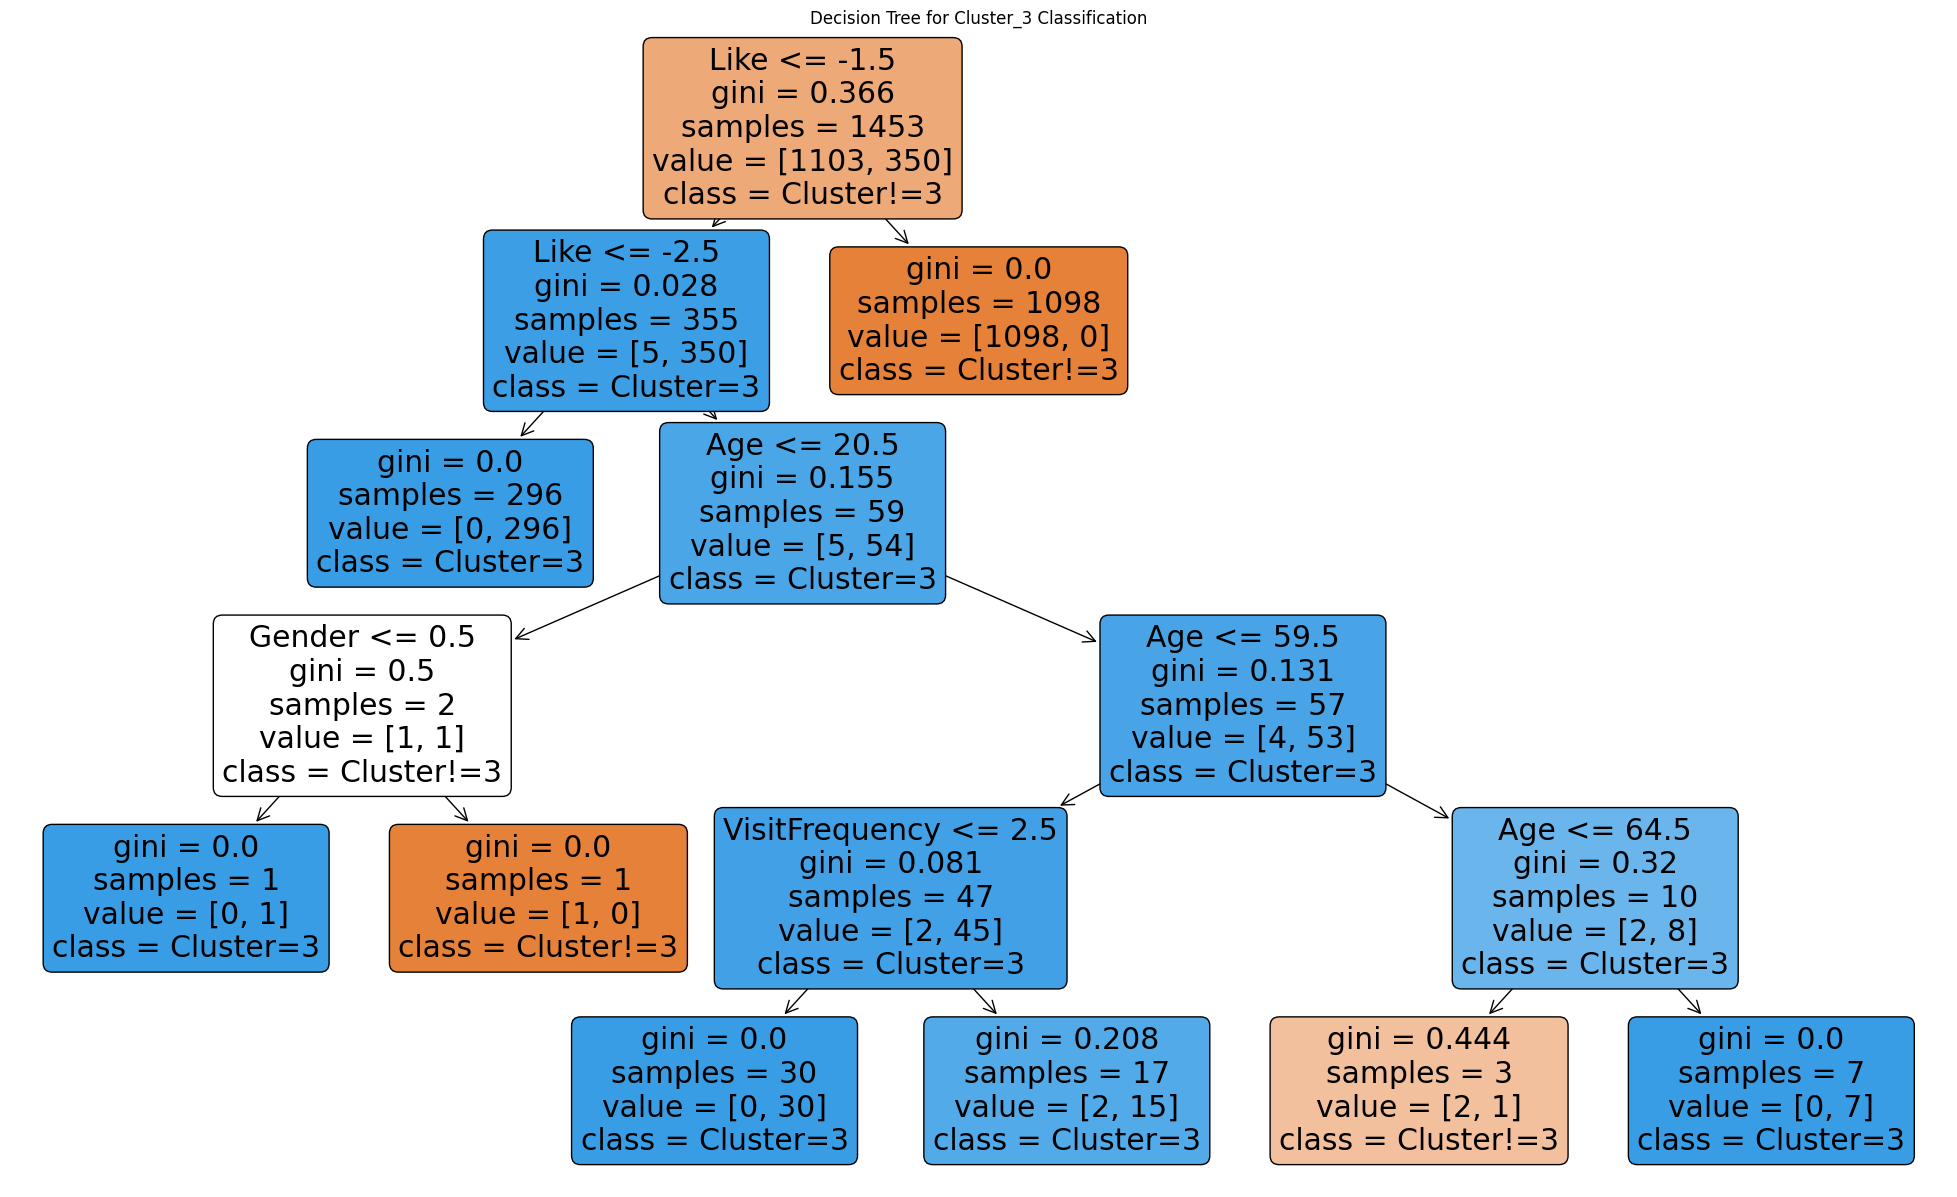

In [76]:
#Construct decision tree
MD_mos['Cluster_1'] = (MD_mos['Cluster'] == 1).astype(int)

# Selecting relevant features for the model
features = ['Like', 'Age', 'VisitFrequency', 'Gender']

# Splitting the data into training and testing sets
X, y = MD_mos[features], MD_mos['Cluster_1']

# Creating a decision tree model
tree_model = DecisionTreeClassifier(random_state=1234, max_depth=5)
tree_model.fit(X, y)

# Plotting the decision tree
plt.figure(figsize=(25, 15))
plot_tree(tree_model, feature_names=features, class_names=['Cluster!=3', 'Cluster=3'], filled=True, rounded=True)
plt.title('Decision Tree for Cluster_3 Classification')
plt.show()

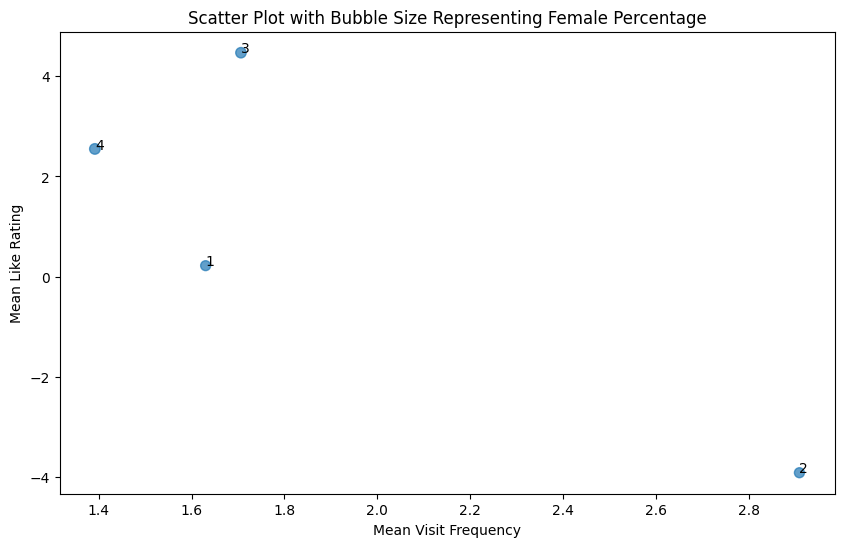

In [77]:
# Scatter plot for clusters wrt mean like rating and mean visiting frequency
visit_means = MD_mos.groupby('Cluster')['VisitFrequency'].mean()
like_means = MD_mos.groupby('Cluster')['Like'].mean()
female_means = MD_mos.groupby('Cluster')['Gender'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(visit_means, like_means, s=100 * female_means, alpha=0.7)


# Add labels to points
for i, txt in enumerate(range(1, 5)):
    plt.text(visit_means[i], like_means[i], str(txt))

# Add labels and title
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Like Rating')
plt.title('Scatter Plot with Bubble Size Representing Female Percentage')

plt.show()